# 数据解析：XPATH与CSS

- 因为在Scrapy框架中，爬虫传递的是scrapy.http.response.html.HtmlResponse对象。可以获取到爬取的页面。
- 处理HtmlResponse内容可以使用传统的解析技术：
    - 正则表达式
    - BeautifulSoup（bs4）
    - lxml 或者ElementTree，或者SAX模型与DOM模型。

## Selector对象

- 在scrapy中Selector对象提供XPATH与CSS操作来解析数据。
- Selector对象创建方法有：
    - XMLFeedSpider类的parse_node方法直接传递就是Selector对象。
    - scrapy.http.response.html.HtmlResponse提供Selector属性。
    - Selector对象的函数返回Selector。
    - 用户自己构造Selector。
    

- 创建一个测试爬虫

```shell

    scrapy genspider -t basic  tencent_selector ke.qq.com

```

- 爬虫代码
    - 修改下`start_urls`。

```python

# -*- coding: utf-8 -*-
import scrapy


class TencentSelectorSpider(scrapy.Spider):
    name = 'tencent_selector'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        print(type(response.selector))


```

### Selector构造器说明

1. 构造器

```python

    __init__(self, response=None, text=None, type=None, root=None, _root=None, **kwargs)

```

- 说明：
    - 可以使用不同的内容构造Selector
        - response
        - text
        - root   （直接使用根节点构造选择器）
   
    - 可以使用类型：
        - type = None，Selector会自动侦测（response就使用response的类型，text就默认html）
        - type = "html"
        - type = "xml"
    
    - root指定根节点

2. 例子
    - 下面四个Selector都是同一个内容
    
```python

# -*- coding: utf-8 -*-
import scrapy
from scrapy.selector.unified import Selector
from lxml.html import HtmlElement


class TencentSelectorSpider(scrapy.Spider):
    name = 'tencent_selector'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        # scrapy.selector.unified.Selector
        # print(type(response))
        # print(type(response.selector))
        content = response.body
        print(type(content))
        # 直接从response获取
        selector_from_response = response.selector
        # 使用response构造
        selector_from_constructor = Selector(response=response)
        # 使用text构造
        selector_from_text = Selector(text=response.text, type='html')
        # 使用root构造
        selector_from_root = Selector(root=response.text.strip())

        # print(response.body)

        print(selector_from_constructor)
        print(selector_from_response)
        print(selector_from_text)
        print(selector_from_root)

        print(selector_from_text.root)  # lxml.html.HtmlElement
        print(type(selector_from_text._root))

```

### Selector的 API说明

- 包路径：`scrapy.selector.unified.Selector`

1. 数据
    - response HTTP响应
    - attrib  属性字典
    - namespaces 命名空间
    - root根节点
    - text 文本
    - type处理类型；xml + html + None
    - selectorlist_cls ：scrapy.selector.unified.SelectorList：选择器列表

```python

# -*- coding: utf-8 -*-
import scrapy
from scrapy.selector.unified import Selector
from lxml.html import HtmlElement


class TencentSelectorSpider(scrapy.Spider):
    name = 'tencent_selector'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        selector = response.selector
        print(selector.response)
        print(selector.attrib)
        print(selector.namespaces)
        print(selector.root)
        print(selector._root)
        # print(selector.text)
        print(selector.type)
        print(selector.selectorlist_cls)

```

- 运行结果
    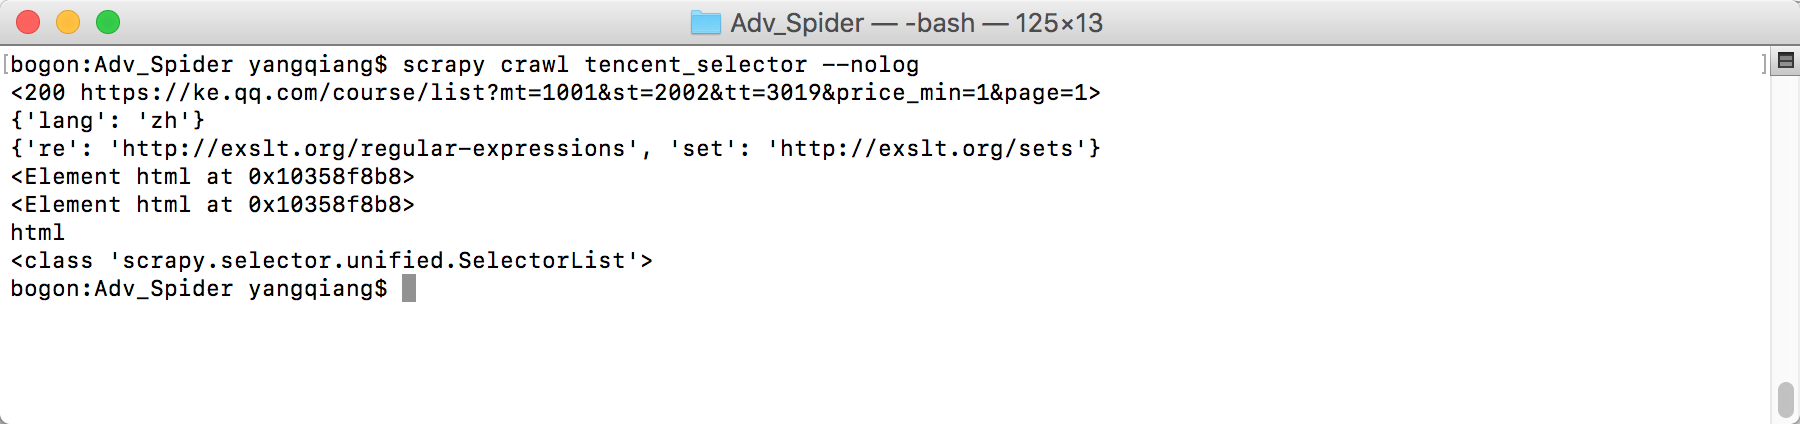

2. 方法
    - select(self, xpath)  
    
    - css(self, query)
    - xpath(self, query, namespaces=None, **kwargs)
    
    - re(self, regex, replace_entities=True)
    - re_first(self, regex, default=None, replace_entities=True)
    
    - extract = get(self)
    - get(self)
    - getall(self)

```python

# -*- coding: utf-8 -*-
import scrapy
from scrapy.selector.unified import Selector
from lxml.html import HtmlElement
import re

class TencentSelectorSpider(scrapy.Spider):
    name = 'tencent_selector'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        selector = response.selector
        sel = selector.select('head')   # SelectorList
        print(type(sel), sel)
        pat = selector.xpath('head')     # SelectorList
        print(type(pat), pat)
        css = selector.css('head')     # SelectorList
        print(type(css), css)

        # 注意：.不支持跨行匹配。
        reg = selector.re(r'<head>([\s\S]*)</head>')   # list
        print(type(reg), reg)


```

- 执行效果
    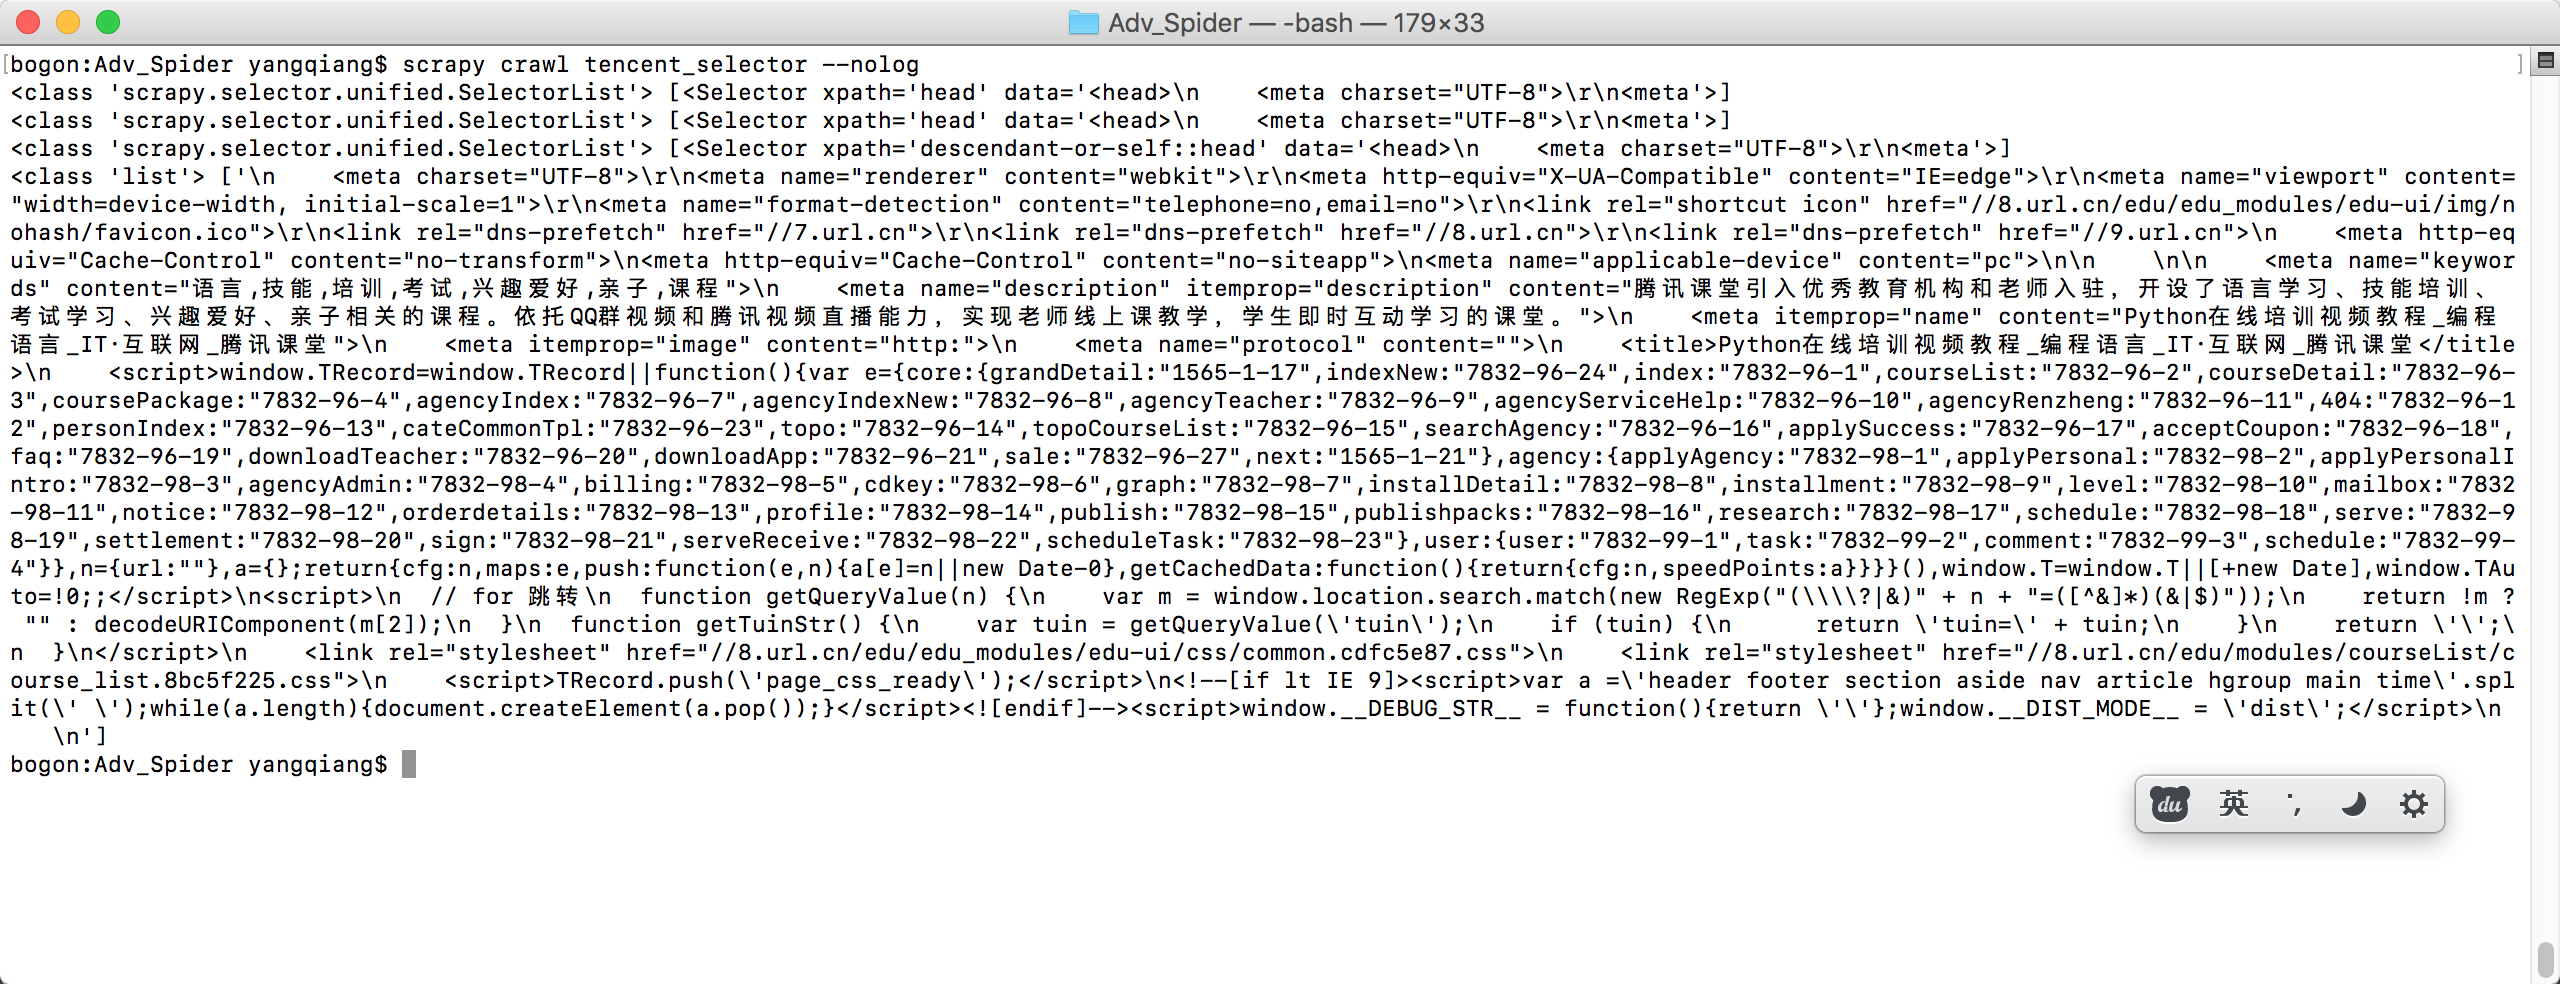

### HtmlResponse的API说明

- HtmlResponse也提供XPATH与CSS操作。

- 包路径：scrapy.http.response.html

1. 属性
    - encoding
    - `selector`
    - text
    - body
    - meta
    - url

2. 方法
    - xpath(self, query, \*\*kwargs)
    - css(self, query)
    
    - urljoin(self, url)
    - replace(self, \*args, \*\*kwargs)
    - follow(self, url, callback=None, method='GET', headers=None, body=None, cookies=None, meta=None, encoding=None, priority=0, dont_filter=False, errback=None)
    - body_as_unicode(self)

### SelectorList说明
- 包路径：`scrapy.selector.unified.SelectorList`
- SelectorList是list的扩展

1. 属性：
    - attrib 属性字典

2. 方法：
    - extract_unquoted(self)
    - select(self, xpath)
    - x(self, xpath)
    
    - css(self, query)
    - xpath(self, xpath, namespaces=None, **kwargs)
    - re(self, regex, replace_entities=True)
    - re_first(self, regex, default=None, replace_entities=True)
    
    - extract = getall(self)
    - extract_first = get(self, default=None)
    - get(self, default=None)
    - getall(self)
    


### XPATH与CSS区别

- CSS最终也是转换为XPATH执行。
- 下面通过一个例子来说明：

```python

# -*- coding: utf-8 -*-
import scrapy
from scrapy.selector.unified import Selector
from lxml.html import HtmlElement
import re

class TencentSelectorSpider(scrapy.Spider):
    name = 'tencent_selector'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        selector = response.selector

        sel = selector.select('ul')   # SelectorList
        print(len(sel), sel)
        pat = selector.xpath('ul')     # SelectorList
        print(len(pat), pat)
        css = selector.css('ul')     # SelectorList
        print(len(css), css)

```

- 运行结果：
    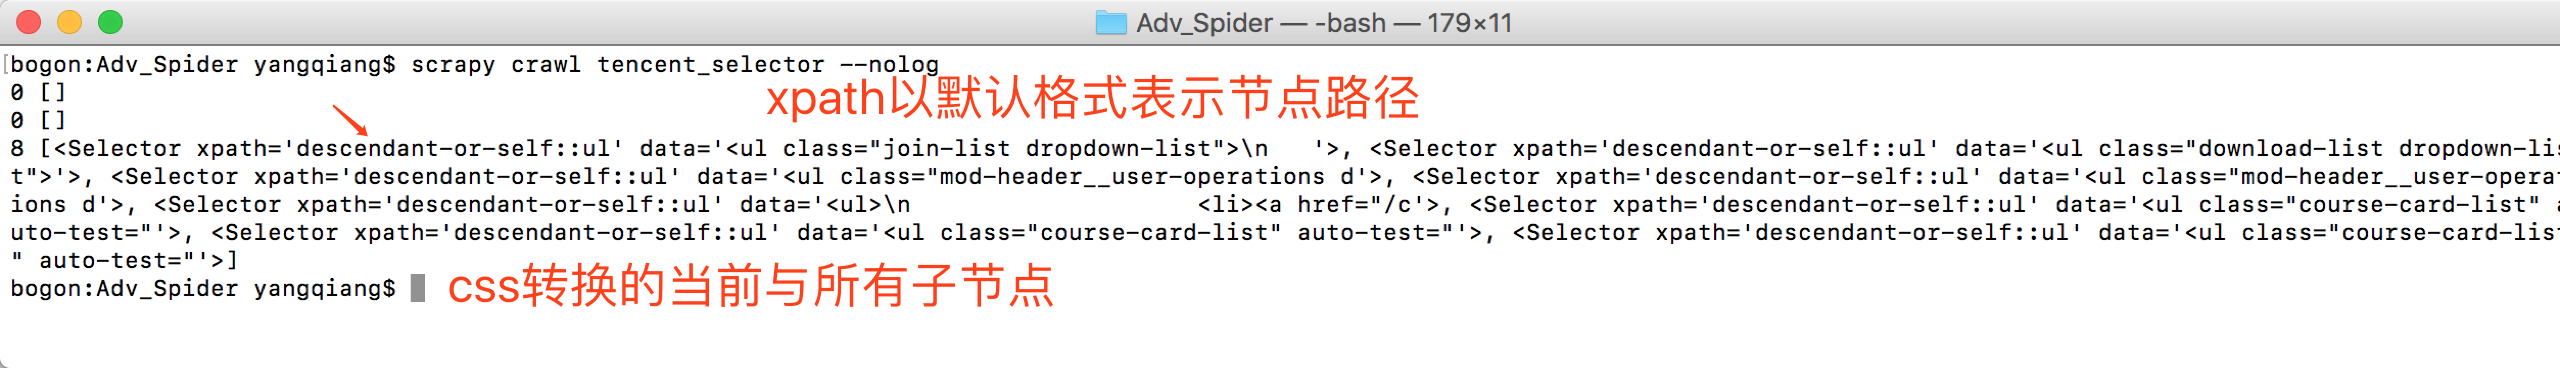
    
    
- 说明：
    只要先明白XPATH，CSS就容易了解。

## XPATH

### 节点与节点值


#### 节点获取

- html与xml的基本单元都是标记，在DOM模型中，称为节点，节点中间的部分为节点值。 每个Selector的节点可以使用root属性获得节点的格式，节点的类型表示为：
    - lxml.html.HtmlElement

```python

# -*- coding: utf-8 -*-
import scrapy
from scrapy.selector.unified import Selector
from lxml.html import HtmlElement
import re

class TencentSelectorSpider(scrapy.Spider):
    name = 'tencent_selector'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        # 得到页面的html选择器
        selector = response.selector
        # 通过path得到节点的选择器。
        pat = selector.xpath('body')
        print(pat)
        # 遍历选择器列表
        for p in pat:
            # 得到每个选择器的节点表示。
            element = p.root
            print(type(element), element)

```

运行结果
    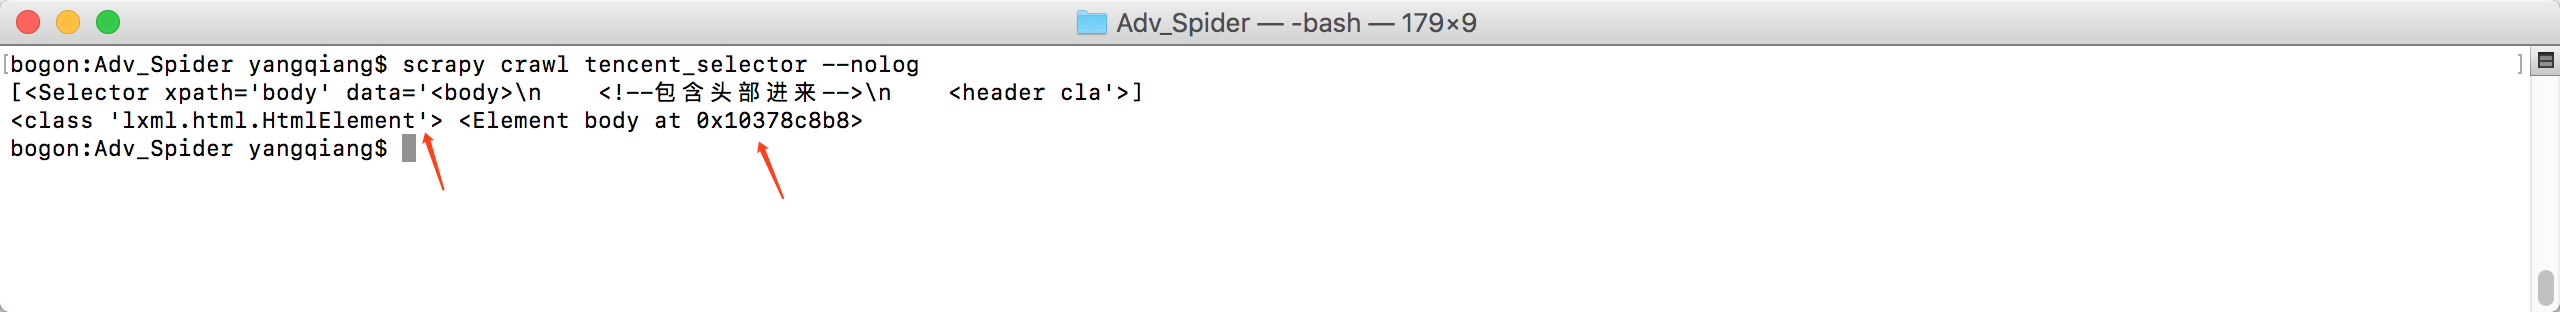

#### HTMLElement节点访问

1. HTMLElement节点属性
    - attrib
    - base
    - nsmap
    - prefix
    - sourceline
    - tag
    - tail
    - text
    
    - base_url
    - body
    - classes
    - forms
    - head
    - label

2. HTMLElement节点方法
    - cssselect(self, expr, translator='html')
    - set(self, key, value=None)
    - addnext(self, element)
    - addprevious(self, element)
    - append(self, element)
    - clear(self)
    - extend(self, elements
    - find(self, path, namespaces)
    - findall(self, path, namespaces)
    - findtext(self, path, default, namespaces)
    - get(self, key, default)
    - getchildren(self)
    - getiterator(self, tag, \*tags)
    - getnext(self)
    - getparent(self)
    - getprevious(self)
    - getroottree(self)
    - index(self, child, start, stop)
    - insert(self, index, element)
    - items(self)
    - iter(self, tag, \*tags)
    - iterancestors(self, tag, \*tags)
    - iterchildren(self, tag, \*tags, reversed)
    - iterdescendants(self, tag, \*tags)
    - iterfind(self, path, namespaces)
    - itersiblings(self, tag, \*tags, preceding)
    - itertext(self, tag, \*tags, with_tail)
    - keys(self)
    - makeelement(self, \_tag, attrib, nsmap, \*\*\_extra)
    - remove(self, element)
    - replace(self, old_element, new_element)
    - values(self)
    - xpath(self, \_path, \*, namespaces, extensions, smart_strings, \*\*\_variables)

```python

# -*- coding: utf-8 -*-
import scrapy
from scrapy.selector.unified import Selector
from lxml.html import HtmlElement
import re

class TencentSelectorSpider(scrapy.Spider):
    name = 'tencent_selector'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):

        pat = selector.xpath('body/header')
        print(pat)
        for p in pat:
            element = p.root
            print(type(element), element)
            print(element.tag)   # 表签名
            print(element.base)    # base url
            print(element.base_url)   # 与上同
            print(element.attrib)     # 属性
            print(element.sourceline)  # 所在的行
            print(element.classes)      # classes属性的字符串集合封装
            print(element.text)   # 第一个子节点之前的文本
            for cls in element.classes:
                print(cls, type(cls))
            print(element.keys())    # 所有属性名
            print(element.values())   # 所有属性值
            # print(element.text_content())   # 节点值
            print(element.getchildren())   # 返回子节点
```

- 运行的效果：
    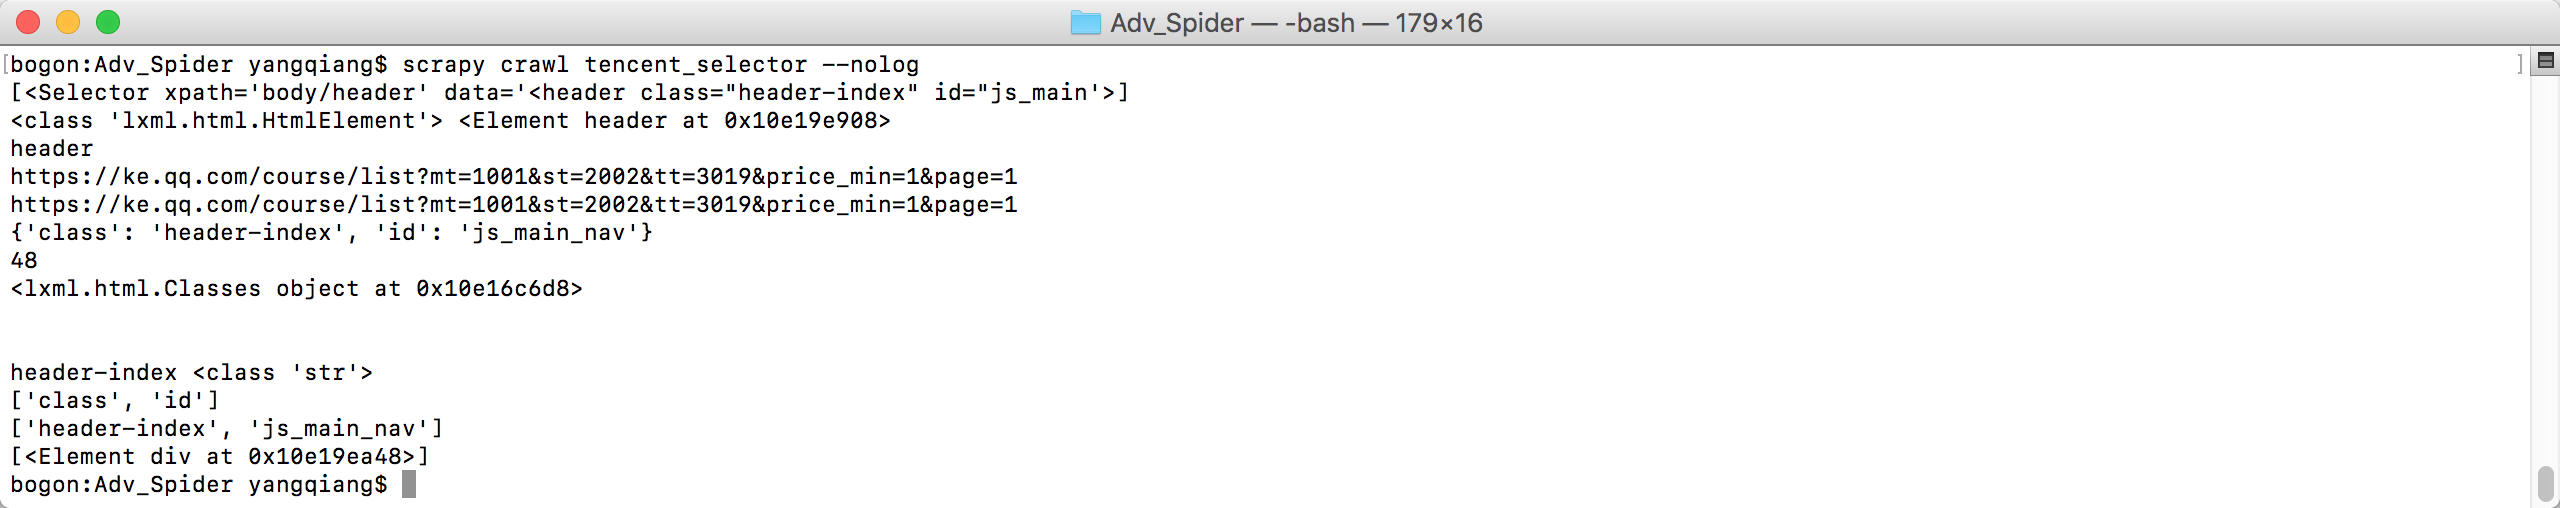

### XPATH的语法

- XPATH的语法分成3个部分
    节点路径（step）+ 节点测试 + 节点谓词
    
- 节点路径：
    - 节点/节点/......表示
    - 节点的表示方式除节点名以外，还有Axes的相对表示方式，以及通配表示方式。

### XPATH节点表达式

表达式	|描述	|实例	 |说明
-|-|-|-
nodename	|选取名字为nodename的子节点|xpath(‘body’)|选取了当前节点的body子节点，默认从当前位置开始
/	|表示选取位置，从根节点选取，或者作为节点分隔符	|xpath(‘/html/body’)	|从根节点上选取body节点，/与节点名一起使用
//	|表示选取位置，选取所有的当前子节点，不考虑他们的位置|xpath(‘//section’)	|选取所有的section节点，//与节点名一起使用
.	|选取当前节点	|xpath(‘.’)|选取当前节点
..	|选取当前节点的父节点|xpath(‘..’)	|选取上一个节点
@	|选取属性|xpath(’@lang’)|选取当前所有的class属性

- XPATH节点表达式使用例子

```python

# -*- coding: utf-8 -*-
import scrapy


class TencentXpathSpider(scrapy.Spider):
    name = 'tencent_xpath'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        selector = response.selector
        print(selector.root.tag)  # 当前selector节点是html
        # 节点名指定节点
        nodename = selector.xpath('body')      # 当前html下的直系子节点
        print(len(nodename), nodename)
        nodename = selector.xpath('//div')  # html下的所有div子节点，包括孙子节点。
        print(len(nodename))
        nodename = selector.xpath('/html/body/header')  # 从根/开始的子节点（根式html）
        print(len(nodename), nodename)
        nodename = selector.xpath('.')  # 当前子节点
        print(len(nodename), nodename)
        nodename = selector.xpath('..')  # 上级子节点（这里返回[]）
        print(len(nodename), nodename)

        nodename = selector.xpath('@lang')  # 返回lang属性的值
        print(len(nodename), nodename)

        # 获取节点的值
        print('获取节点值：', nodename.get())    # 第一个
        print('获取节点值：', nodename.getall())  # 返回所有

```

- 运行结果
    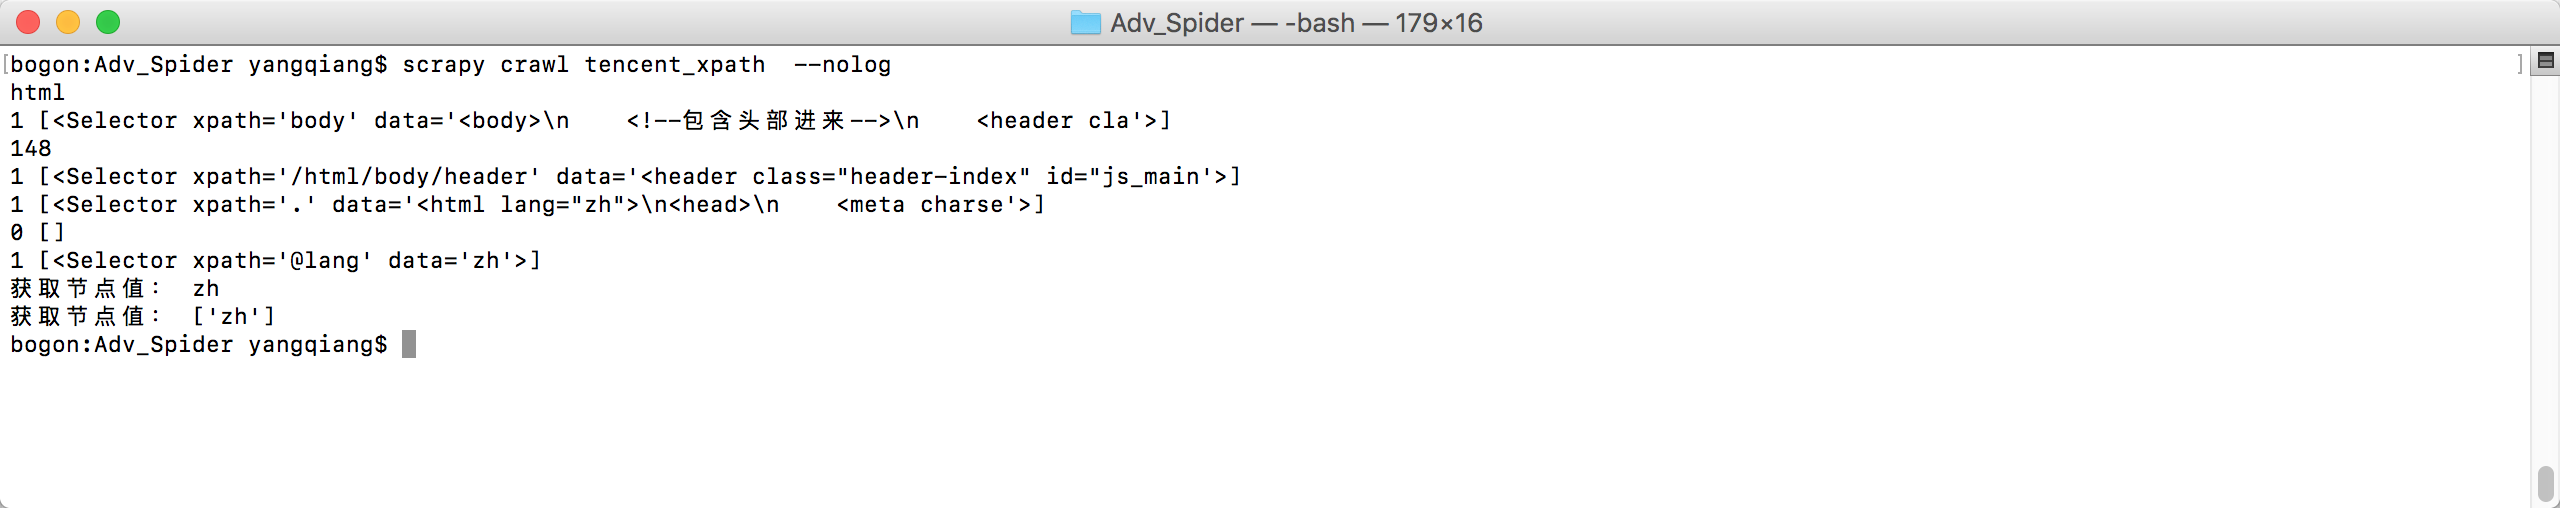

- XPath组合使用的例子
    
    - 问题：在爬取腾讯课堂的页面，进行解析的时候，会出现从浏览器中拷贝的XPATH，到代码中无法定位。
    - **下面代码能定位**
    ```python

        nodes = response.xpath('/html/body//section')
        print(len(nodes))

    ```
    - **下面代码无法定位**
    ```python

        nodes = response.xpath('/html/body/section')
        print(len(nodes))

    ```



### 节点谓词操作

- 通过谓词，可以对选择的节点进行定位与过滤


表达式|	结果
-|-
xpath(‘body/section[1]’)|选取body下的第一个section节点
xpath(‘body/section[last()]’)|选取body下最后一个section节点
xpath(‘body/section[last()-1]’)	|选取body下倒数第二个section节点
xpath(‘body/section[positon()<3]’)	|选取body下前两个section节点
xpath(‘body/section[@class]’)	|选取body下带有class属性的section节点
xpath(‘body/section[@class=”main”]’)	|选取body下class属性为main的section节点
xpath(‘body/section[price>35.00]’)	|选取包含price元素并且值大于35的section节点

- 谓词使用例子：

```python

# -*- coding: utf-8 -*-
import scrapy


class TencentXpathSpider(scrapy.Spider):
    name = 'tencent_xpath'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        selector = response.selector
        nodes = response.xpath('/html/body//section')
        print(len(nodes), nodes)
        nodes = response.xpath('/html/body//section[1]')   # 位置从1开始
        print(len(nodes), nodes)
        nodes = response.xpath('/html/body//section[last()]')   # 最后位置，没有first
        print(len(nodes), nodes)
        nodes = response.xpath('/html/body//section[last()-1]')   # 以最后为坐标的相对位置
        print(len(nodes), nodes)
        nodes = response.xpath('/html/body//section[position()>=2]')  # 没有等于==，等于直接使用位置。
        print(len(nodes), nodes)
        nodes = response.xpath('/html/body//section[@class]')   # 含有属性
        print(len(nodes), nodes)
        nodes = response.xpath('/html/body//section[@class="main autoM clearfix"]')  # 属性等于值
        print(len(nodes), nodes)
        nodes = response.xpath('/html/body//section/div/div//ul/li/div[span]')   # 包含子节点
        print('[span=]', nodes)
        nodes = response.xpath('/html/body//section/div/div//ul/li/div[span="¥6800.00"]')  # 包含子节点的text节点为¥6800.00
        print('[span=]', nodes)

```

- 运行效果：
    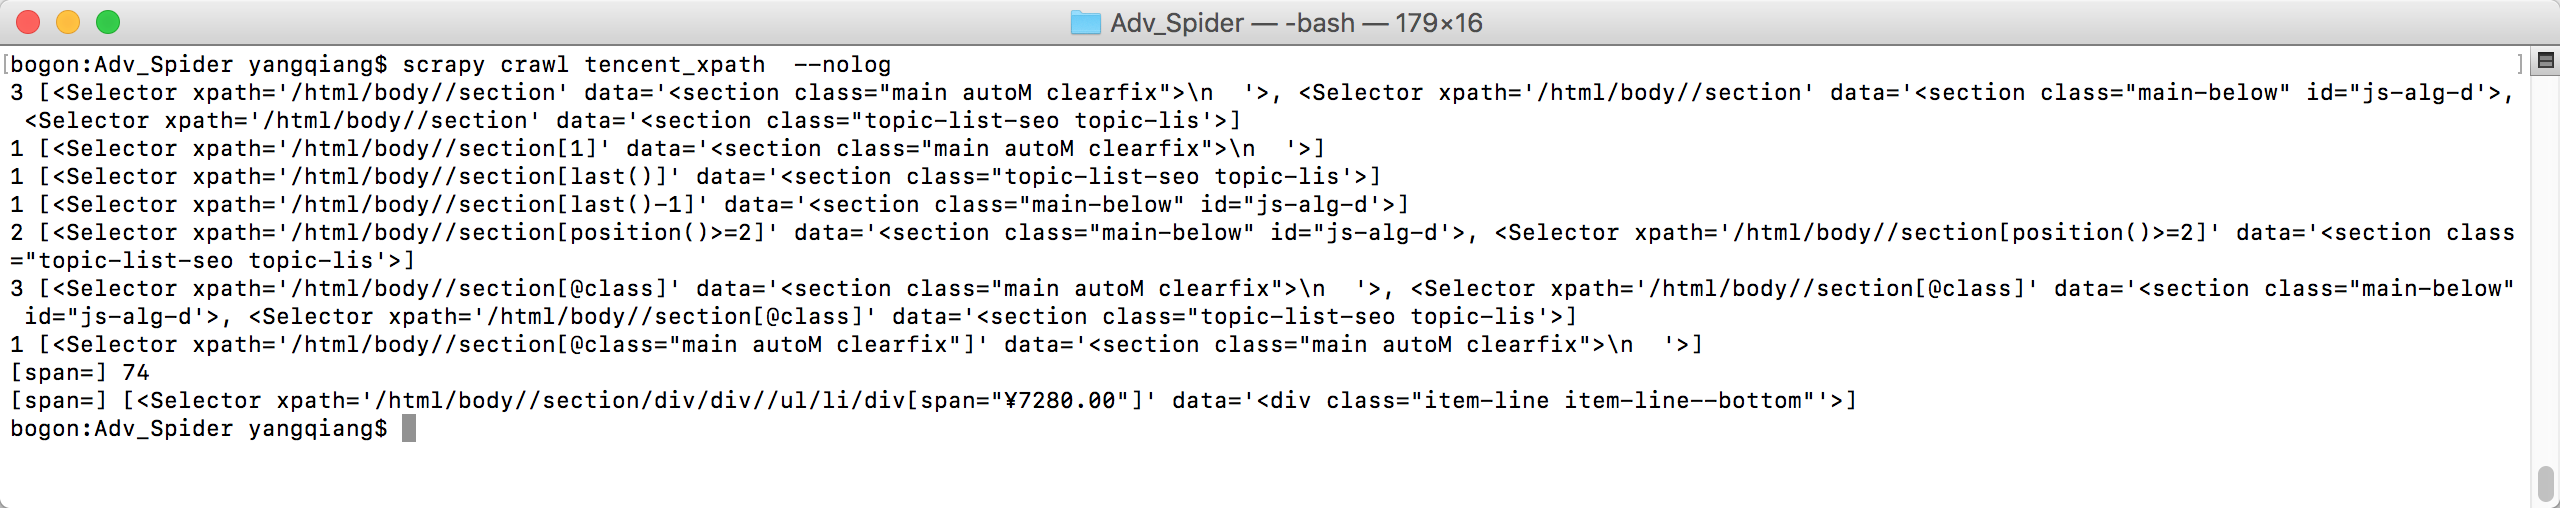

### 通配符节点

通配符	|描述
-|-
\*	|匹配任何元素节点。
\@\*	|匹配任何属性节点。
node()	|匹配任何类型的节点。
text()| 匹配任何文本子节点

- 例子：

```python

# -*- coding: utf-8 -*-
import scrapy


class TencentXpathSpider(scrapy.Spider):
    name = 'tencent_xpath'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        selector = response.selector
      
        nodes = response.xpath('/html/body//section/*')   # 所有section节点下的所有元素子节点
        print('找到节点数：', len(nodes))

        nodes = response.xpath('/html/body//section/@*')  # 取出所有section的所有属性值
        print(len(nodes), nodes)

        nodes = response.xpath('/html/body/node()')  # 取出所有类型的子节点
        print('所有类型子节点：', len(nodes), nodes)
        nodes = response.xpath('/html/body/*')  # 取出所有类型时元素（Element）的子节点
        print('所有元素子节点:', len(nodes), nodes)
        nodes = response.xpath('/html/body/text()')
        print('所有文本子节点数：', len(nodes), nodes)

```

- 运行结果：
    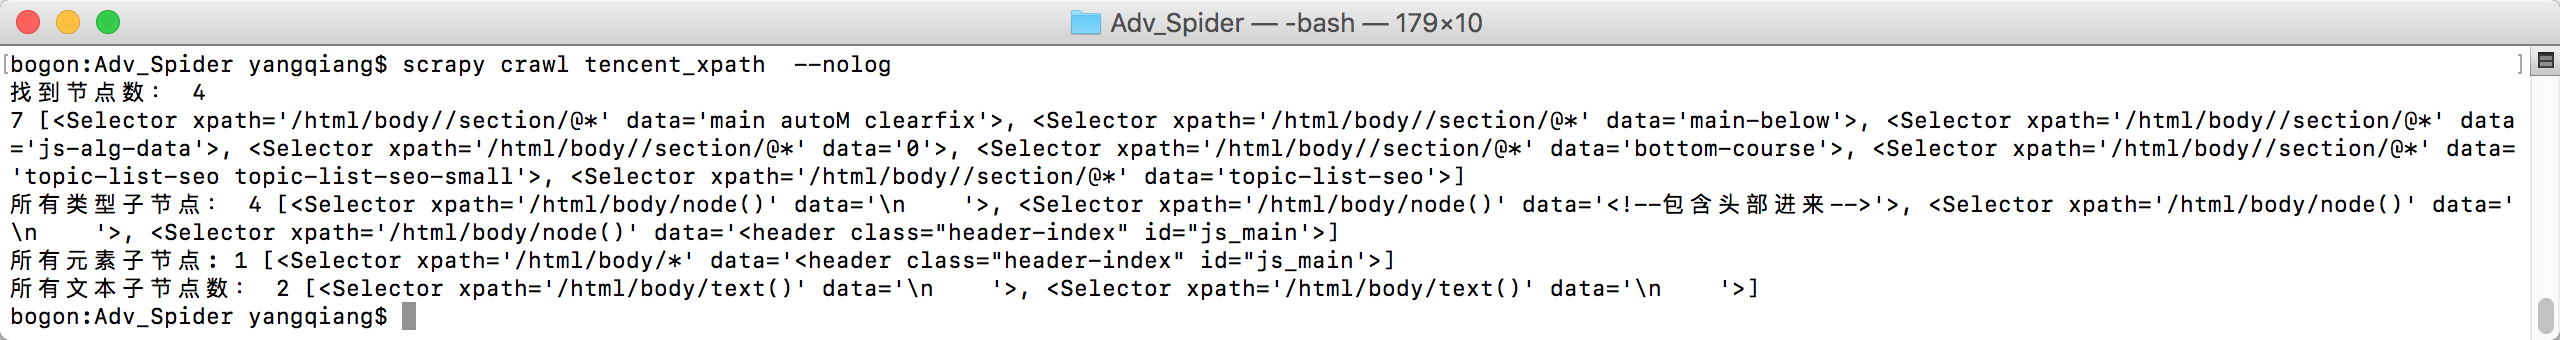

### 多个路径

- 使用`|`符号选取两个路径：

- 例子代码

```python

# -*- coding: utf-8 -*-
import scrapy


class TencentXpathSpider(scrapy.Spider):
    name = 'tencent_xpath'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        nodes = response.xpath('/html/body//section')
        print('找到节点数：', len(nodes))
        nodes = response.xpath('/html/body//header')
        print('找到节点数：', len(nodes))

        nodes = response.xpath('/html/body//section|/html/body//header')
        print('找到节点数：', len(nodes))

```


- 运行效果：
    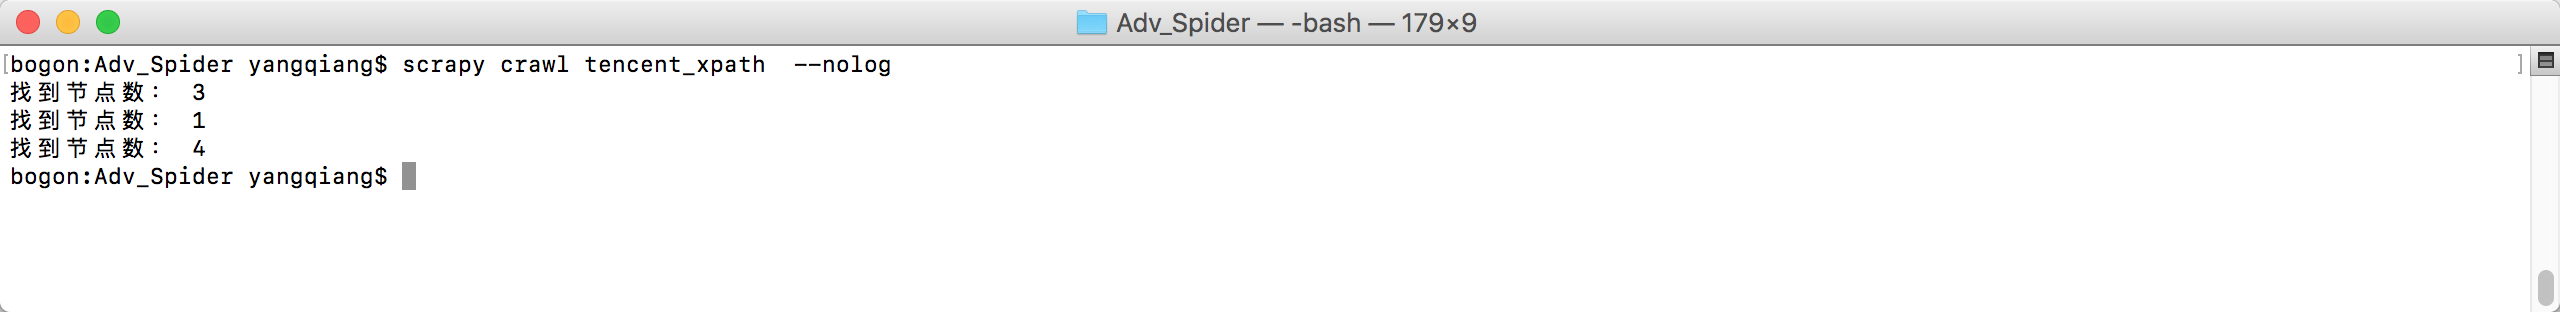

### XPATH的Axes轴

- Axes的标准使用方式：
    `轴名称::节点测试[谓语]`
    
- Axes参考文档：    


轴名称	|例子|结果
-|-|-
ancestor	|xpath(‘./ancestor::\*’)|选取当前节点的所有先辈（父、祖父等）。
ancestor-or-self	|xpath(‘./ancestor-or-self::\*’)|选取当前节点的所有先辈（父、祖父等）以及当前节点本身。
attribute	|xpath(‘./attribute::\*’)|当前节点的所有属性。
child	|xpath(‘./child::\*’)|选取当前节点的所有子元素。
descendant	|xpath(‘./descendant::\*’)|选取当前节点的所有后代元素（子、孙等）。
descendant-or-self	| \- |选取当前节点的所有后代元素（子、孙等）以及当前节点本身。
following	|xpath(‘./following::\*’)|选取文档中当前节点的结束标签之后的所有节点。
following-sibling | xpath(‘./following-sibling::\*’)|选取当前节点之后的兄弟节点。
namespace	| \- |选取当前节点的所有命名空间节点。
parent	|xpath(‘./parent::\*’)|选取当前节点的父节点。
preceding	|xpath(‘./preceding::\*’)|选取文档中当前节点的开始标签之前的所有节点。
preceding-sibling	|xpath(‘./preceding-sibling::\*’)|选取当前节点之前的所有同级节点。
self	|xpath(‘./self::\*’)|选取当前节点。

- 例子代码

```python

# -*- coding: utf-8 -*-
import scrapy


class TencentXpathSpider(scrapy.Spider):
    name = 'tencent_xpath'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        selector = response.selector

        nodes = response.xpath('/html/body//section/ancestor::*')
        print('ancestor：', len(nodes))  # html  body header  div

        nodes = response.xpath('/html/body//section/ancestor-or-self::*')
        print('ancestor-or-self：', len(nodes))  # html  body header  div

        nodes = response.xpath('/html/body//section/attribute::*')
        print('attribute：', len(nodes))  # html  body header  div

        nodes = response.xpath('/html/body//section/child::*')
        print('child：', len(nodes))  # html  body header  div

        nodes = response.xpath('/html/body//section/descendant::*')
        print('descendant：', len(nodes))  # html  body header  div

        nodes = response.xpath('/html/body//section/descendant-or-self::*')
        print('descendant-or-self：', len(nodes))  # html  body header  div

        nodes = response.xpath('/html/body//section/following::*')
        print('following：', len(nodes))  # html  body header  div
        nodes = response.xpath('/html/body//section/following-sibling::*')
        print('following-sibling：', len(nodes))  # html  body header  div
        nodes = response.xpath('/html/body//section/namespace::*')
        print('namespace：', len(nodes), nodes)  # html  body header  div

        nodes = response.xpath('/html/body//section/parent::*')
        print('parent：', len(nodes), nodes)  # html  body header  div

        nodes = response.xpath('/html/body//section/preceding::*')
        print('preceding：', len(nodes))  # html  body header  div

        nodes = response.xpath('/html/body//section/preceding-sibling::*')
        print('preceding-sibling：', len(nodes))  # html  body header  div

        nodes = response.xpath('/html/body//section/self::section[@class="main autoM clearfix"]')
        print('self：', len(nodes), nodes)  # html  body header  div

```
- 运行结果
    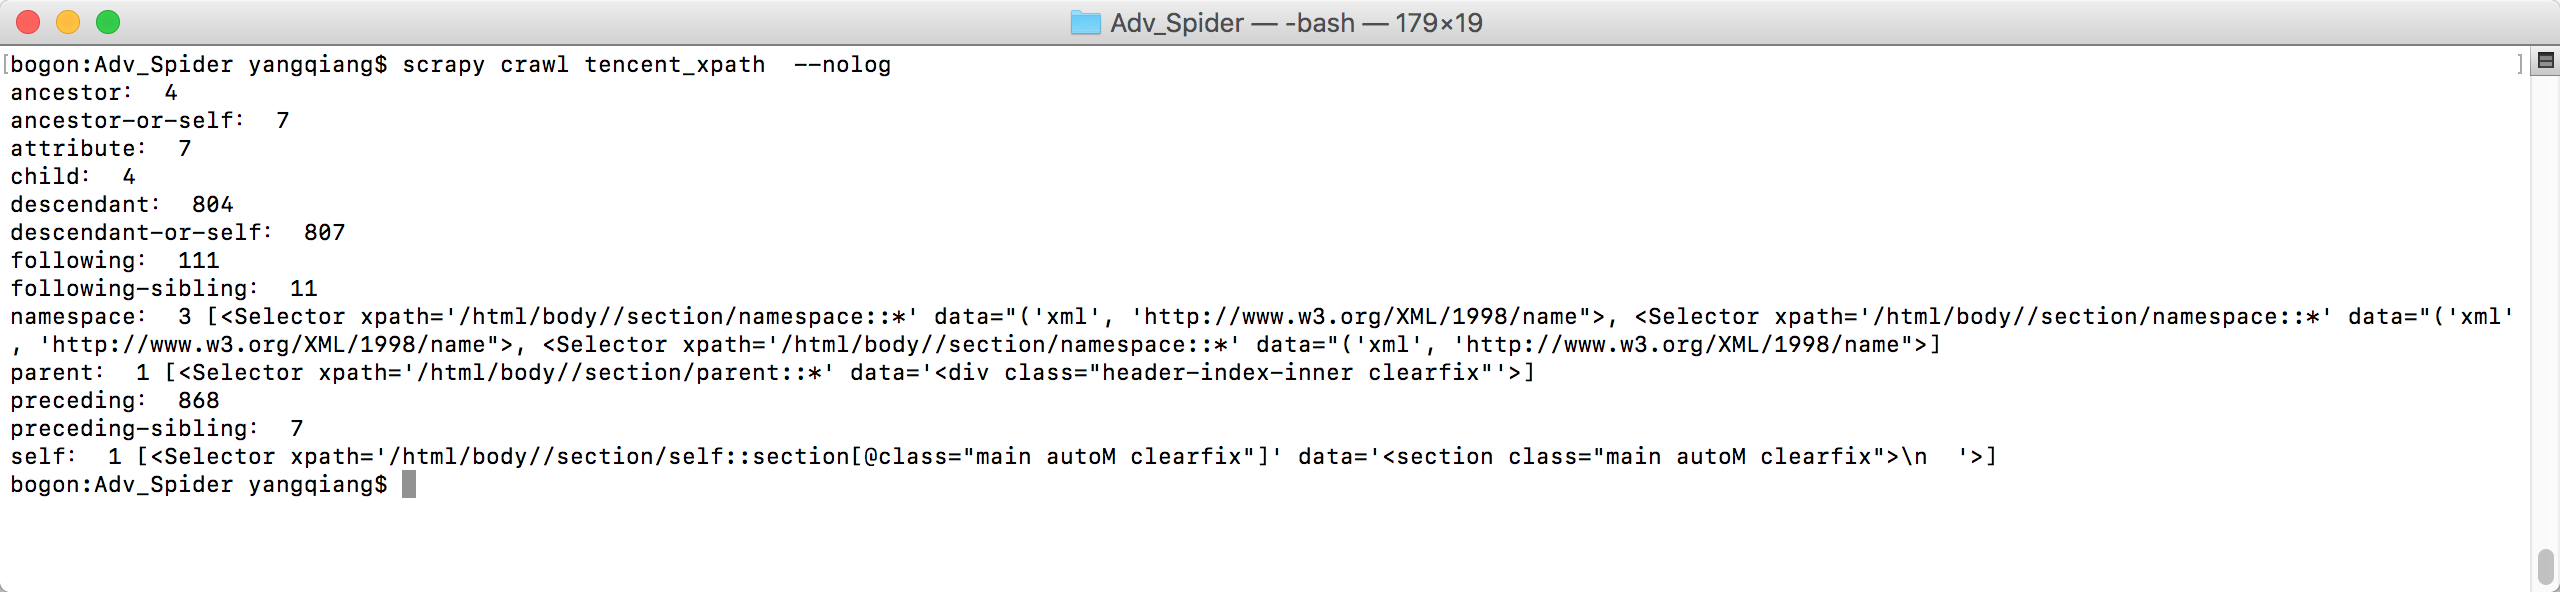

### 节点测试


节点类型测试| 说明
-|-
node() |matches any node.
text() |matches any text node.
comment() |matches any comment node.
namespace-node() |matches any namespace node.
element() |matches any element node.
schema-element(person) |matches any element node whose name is person (or is in the substitution group headed by person), and whose type annotation is the same as (or is derived from) the declared type of the person element in the in-scope element declarations.
element(person) |matches any element node whose name is person, regardless of its type annotation.
element(person, surgeon) |matches any non-nilled element node whose name is person, and whose type annotation is surgeon or is derived from surgeon.
element(*, surgeon) |matches any non-nilled element node whose type annotation is surgeon (or is derived from surgeon), regardless of its name.
attribute() |matches any attribute node.
attribute(price) |matches any attribute whose name is price, regardless of its type annotation.
attribute(*, xs:decimal) |matches any attribute whose type annotation is xs:decimal (or is derived from xs:decimal), regardless of its name.
document-node() |matches any document node.
document-node(element(book)) |matches any document node whose content consists of a single element node that satisfies the kind test element(book), interleaved with zero or more comments and processing instructions.


- 上面很多概念来自XML的文档，尤其是XSD的XML描述，比如：element(person, surgeon)执行节点类型，这是在传统的DTD中节点是没有类型的。

- 下面是一个简单的使用例子：

```python

        nodes = response.xpath('/html/body/comment()')
        print('self：', len(nodes), nodes)  # 获取注释节点
```

- 运行结果
    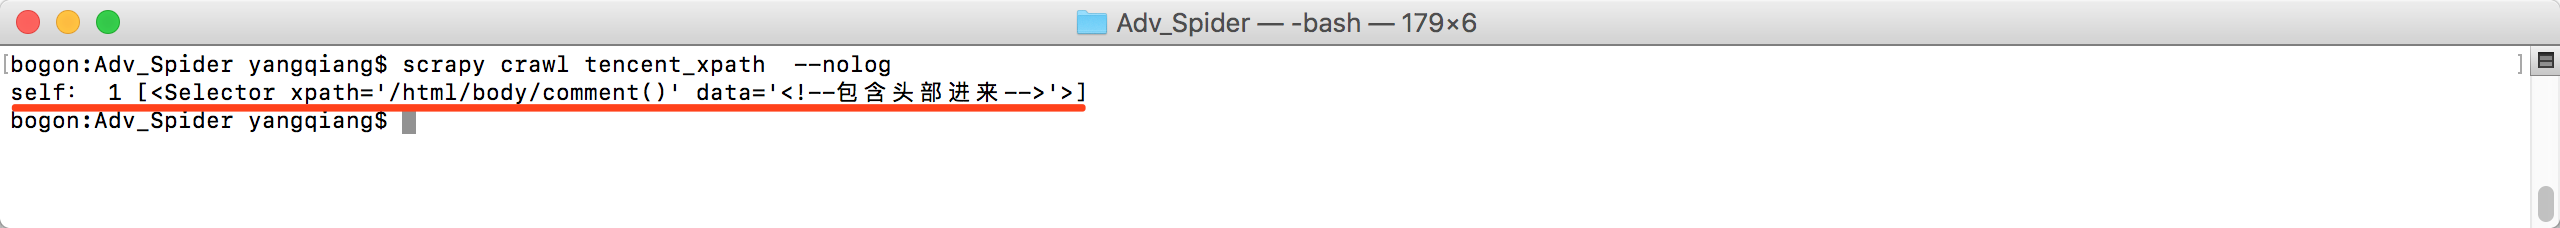

### XAPTH函数

1. 官方的参考文档：https://www.w3.org/TR/xpath-functions-30/

    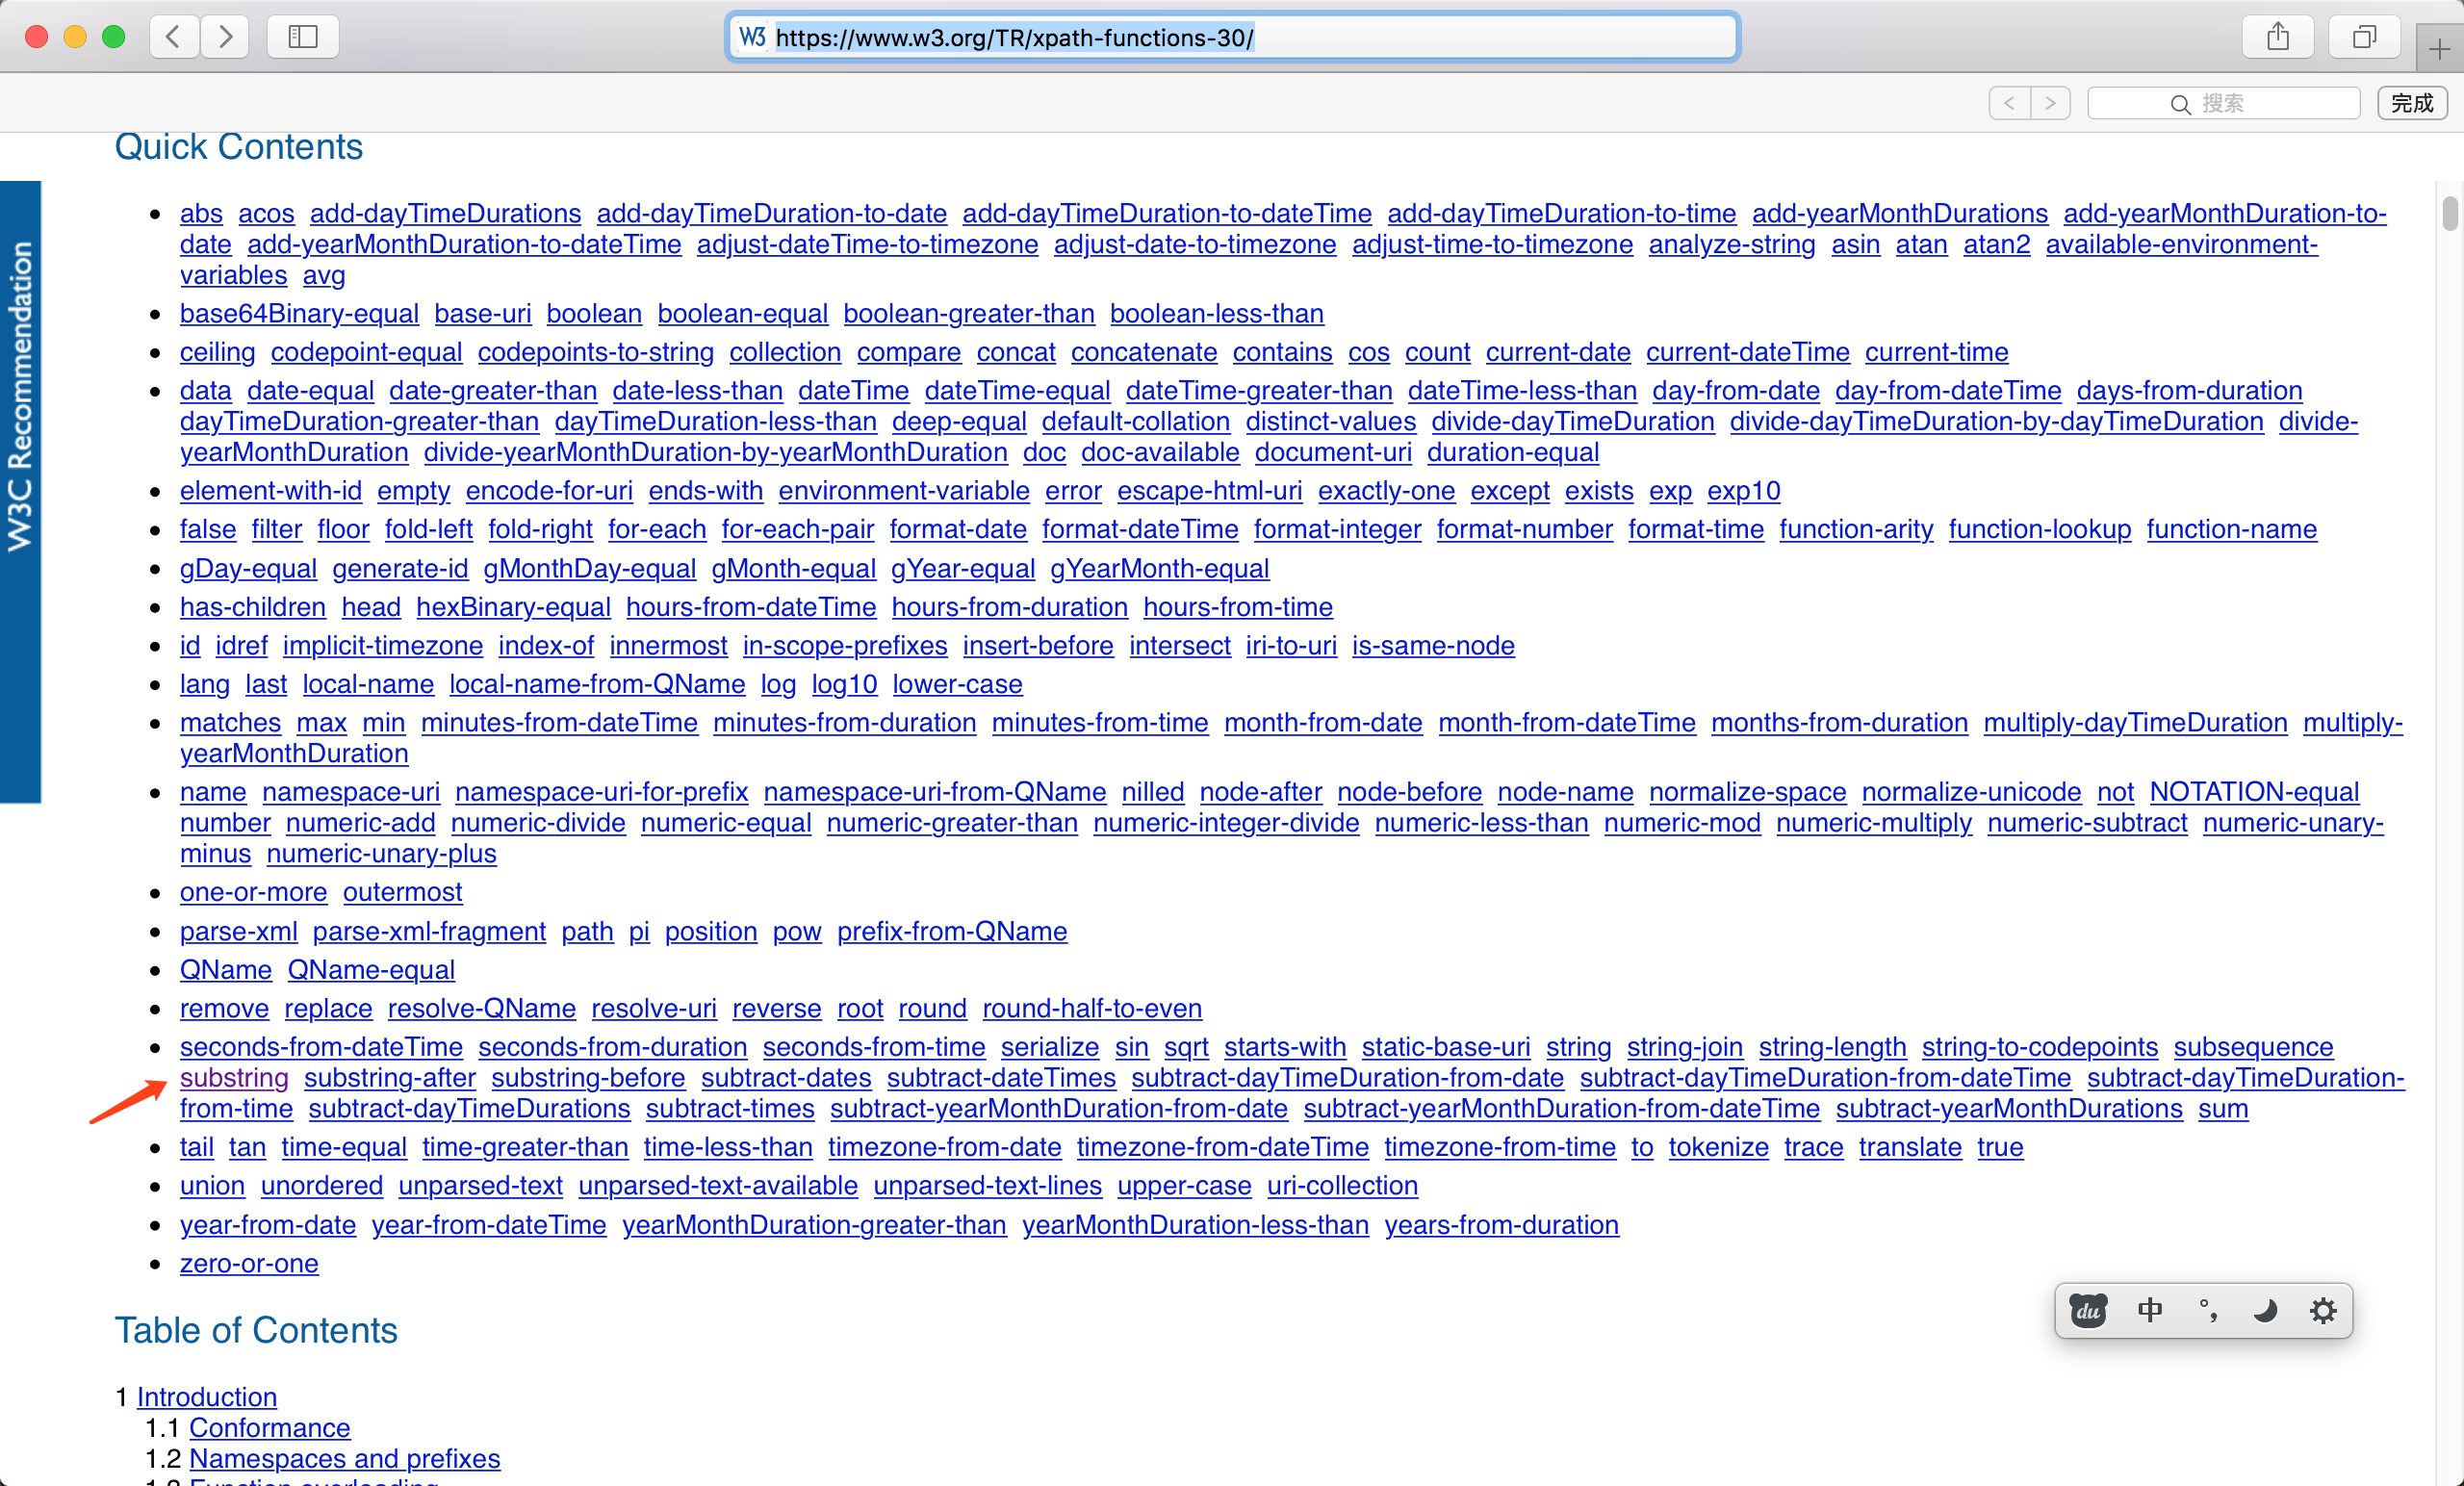


2. 一个简单的使用例子

```python

        nodes = response.xpath('/html/body//section/div/div//ul/li/div/span[substring(text(),2)="7280.00"]/text()')
        print('self：', len(nodes), nodes)

```

- 运行结果
    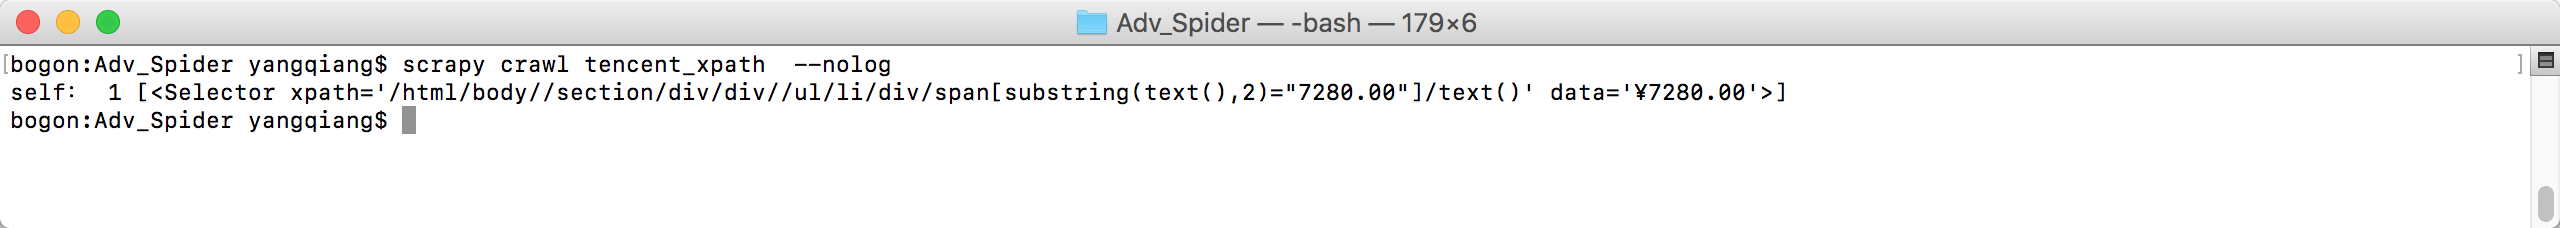

3. XPATH函数不能作为节点使用，只能在谓词中使用。


4. 常用的函数
    
    - 数学计算函数
        - sin
        - pow
        - abs
        - ...
    
    - 字符串处理函数
        - starts-with
        - ends-with
        - substring
        - ...
    
    - 日期处理函数
        - hours-from-time
        - ...
    
    - 判别函数
        - contains
        - not
        - ...
    
    - 节点操作函数
        - name
        - node-name
        - ...

### XAPTH运算符



\#	|Operator	|Associativity
-|-|-
1	|, (comma)	|either
2	|for, let, some, every, if	|NA
3	|or	|either
4	|and	|either
5	|eq, ne, lt, le, gt, ge, =, !=, <, <=, >, >=, is, <<, >>	|NA
6	|\|\|	|left-to-right
7	|to	|NA
8	|+, - (binary)	|left-to-right
9	|\*, div, idiv, mod	|left-to-right
10	|union, \|	|either
11	|intersect, except	|left-to-right
12	|instance of	|NA
13	|treat as	|NA
14	|castable as	|NA
15	|cast as	|NA
16	|-, + (unary)	|right-to-left
17	|!	|left-to-right
18	|/, //	|left-to-right
19	|\[ \]	|left-to-right


- 上述的运算符还支持XQuery

- 官方提供的运算规则详细罗列：


Operator	|Type(A)	|Type(B)	|Function	|Result type
-|-|-|-|-
A + B	|numeric	|numeric	|op:numeric-add(A, B)	|numeric
A + B	|xs:date	|xs:yearMonthDuration	|op:add-yearMonthDuration-to-date(A, B)|xs:date
A + B	|xs:yearMonthDuration	|xs:date	|op:add-yearMonthDuration-to-date(B, A)	|xs:date
A + B	|xs:date	|xs:dayTimeDuration	|op:add-dayTimeDuration-to-date(A, B)	|xs:date
A + B	|xs:dayTimeDuration	|xs:date	|op:add-dayTimeDuration-to-date(B, A)	|xs:date
A + B	|xs:time	|xs:dayTimeDuration	|op:add-dayTimeDuration-to-time(A, B)	|xs:time
A + B	|xs:dayTimeDuration	|xs:time	|op:add-dayTimeDuration-to-time(B, A)	|xs:time
A + B	|xs:dateTime	|xs:yearMonthDuration	|op:add-yearMonthDuration-to-dateTime(A, B)	|xs:dateTime
A + B	|xs:yearMonthDuration	|xs:dateTime	|op:add-yearMonthDuration-to-dateTime(B, A)	|xs:dateTime
A + B	|xs:dateTime	|xs:dayTimeDuration	|op:add-dayTimeDuration-to-dateTime(A, B)	|xs:dateTime
A + B	|xs:dayTimeDuration	|xs:dateTime	|op:add-dayTimeDuration-to-dateTime(B, A)	|xs:dateTime
A + B	|xs:yearMonthDuration	|xs:yearMonthDuration	|op:add-yearMonthDurations(A, B)	|xs:yearMonthDuration
A + B	|xs:dayTimeDuration	|xs:dayTimeDuration	|op:add-dayTimeDurations(A, B)	|xs:dayTimeDuration
A - B	|numeric	|numeric	|op:numeric-subtract(A, B)	|numeric
A - B	|xs:date	|xs:date	|op:subtract-dates(A, B)	|xs:dayTimeDuration
A - B	|xs:date	|xs:yearMonthDuration	|op:subtract-yearMonthDuration-from-date(A, B)	|xs:date
A - B	|xs:date	|xs:dayTimeDuration	|op:subtract-dayTimeDuration-from-date(A, B)	xs:date
A - B	|xs:time	|xs:time	|op:subtract-times(A, B)	|xs:dayTimeDuration
A - B	|xs:time	|xs:dayTimeDuration	|op:subtract-dayTimeDuration-from-time(A, B)	|xs:time
A - B	|xs:dateTime	|xs:dateTime	|op:subtract-dateTimes(A, B)	|xs:dayTimeDuration
A - B	|xs:dateTime	|xs:yearMonthDuration	|op:subtract-yearMonthDuration-from-dateTime(A, B)	|xs:dateTime
A - B	|xs:dateTime	|xs:dayTimeDuration	|op:subtract-dayTimeDuration-from-dateTime(A, B)	|xs:dateTime
A - B	|xs:yearMonthDuration	|xs:yearMonthDuration	|op:subtract-yearMonthDurations(A, B)	|xs:yearMonthDuration
A - B	|xs:dayTimeDuration	|xs:dayTimeDuration	|op:subtract-dayTimeDurations(A, B)	|xs:dayTimeDuration
A \* B	|numeric	|numeric	|op:numeric-multiply(A, B)	|numeric
A \* B	|xs:yearMonthDuration	|numeric	|op:multiply-yearMonthDuration(A, B)	|xs:yearMonthDuration
A \* B	|numeric	|xs:yearMonthDuration	|op:multiply-yearMonthDuration(B, A)	|xs:yearMonthDuration
A \* B	|xs:dayTimeDuration	|numeric	|op:multiply-dayTimeDuration(A, B)	|xs:dayTimeDuration
A \* B	|numeric	|xs:dayTimeDuration	|op:multiply-dayTimeDuration(B, A)	|xs:dayTimeDuration
A idiv B	|numeric	|numeric	|op:numeric-integer-divide(A, B)	|xs:integer
A div B	|numeric	|numeric	|op:numeric-divide(A, B)	|numeric; but xs:decimal if both operands are xs:integer
A div B	|xs:yearMonthDuration	|numeric	|op:divide-yearMonthDuration(A, B)	|xs:yearMonthDuration
A div B	|xs:dayTimeDuration	|numeric	|op:divide-dayTimeDuration(A, B)	|xs:dayTimeDuration
A div B	|xs:yearMonthDuration	|xs:yearMonthDuration	|op:divide-yearMonthDuration-by-yearMonthDuration (A, B)	|xs:decimal
A div B	|xs:dayTimeDuration	|xs:dayTimeDuration	|op:divide-dayTimeDuration-by-dayTimeDuration (A, B)	|xs:decimal
A mod B	|numeric	|numeric	|op:numeric-mod(A, B)	|numeric
A eq B	|numeric	|numeric	|op:numeric-equal(A, B)	|xs:boolean
A eq B	|xs:boolean	|xs:boolean	|op:boolean-equal(A, B)	|xs:boolean
A eq B	|xs:string	|xs:string	|op:numeric-equal(fn:compare(A, B), 0)	|xs:boolean
A eq B	|xs:date	|xs:date	|op:date-equal(A, B)	|xs:boolean
A eq B	|xs:time	|xs:time	|op:time-equal(A, B)	|xs:boolean
A eq B	|xs:dateTime	|xs:dateTime	|op:dateTime-equal(A, B)	|xs:boolean
A eq B	|xs:duration	|xs:duration	|op:duration-equal(A, B)	|xs:boolean
A eq B	|Gregorian	|Gregorian	|op:gYear-equal(A, B) etc.	|xs:boolean
A eq B	|xs:hexBinary	|xs:hexBinary	|op:hexBinary-equal(A, B)	|xs:boolean
A eq B	|xs:base64Binary	|xs:base64Binary	|op:base64Binary-equal(A, B)	|xs:boolean
A eq B	|xs:anyURI	|xs:anyURI	|op:numeric-equal(fn:compare(A, B), 0)	|xs:boolean
A eq B	|xs:QName	|xs:QName	|op:QName-equal(A, B)	|xs:boolean
A eq B	|xs:NOTATION	|xs:NOTATION	|op:NOTATION-equal(A, B)	|xs:boolean
A ne B	|numeric	|numeric	|fn:not(op:numeric-equal(A, B))	|xs:boolean
A ne B	|xs:boolean	|xs:boolean	|fn:not(op:boolean-equal(A, B))	|xs:boolean
A ne B	|xs:string	|xs:string	|fn:not(op:numeric-equal(fn:compare(A, B), 0))	|xs:boolean
A ne B	|xs:date	|xs:date	|fn:not(op:date-equal(A, B))	|xs:boolean
A ne B	|xs:time	|xs:time	|fn:not(op:time-equal(A, B))	|xs:boolean
A ne B	|xs:dateTime	|xs:dateTime	|fn:not(op:dateTime-equal(A, B))	|xs:boolean
A ne B	|xs:duration	|xs:duration	|fn:not(op:duration-equal(A, B))	|xs:boolean
A ne B	|Gregorian	|Gregorian	|fn:not(op:gYear-equal(A, B)) etc.	|xs:boolean
A ne B	|xs:hexBinary	|xs:hexBinary	|fn:not(op:hexBinary-equal(A, B))	|xs:boolean
A ne B	|xs:base64Binary	|xs:base64Binary	|fn:not(op:base64Binary-equal(A, B))	|xs:boolean
A ne B	|xs:anyURI	|xs:anyURI	|fn:not(op:numeric-equal(fn:compare(A, B), 0))	|xs:boolean
A ne B	|xs:QName	|xs:QName	|fn:not(op:QName-equal(A, B))	|xs:boolean
A ne B	|xs:NOTATION	|xs:NOTATION	|fn:not(op:NOTATION-equal(A, B))	|xs:boolean
A gt B	|numeric	|numeric	|op:numeric-greater-than(A, B)	|xs:boolean
A gt B	|xs:boolean	|xs:boolean	|op:boolean-greater-than(A, B)	|xs:boolean
A gt B	|xs:string	|xs:string	|op:numeric-greater-than(fn:compare(A, B), 0)	|xs:boolean
A gt B	|xs:date	|xs:date	|op:date-greater-than(A, B)	|xs:boolean
A gt B	|xs:time	|xs:time	|op:time-greater-than(A, B)	|xs:boolean
A gt B	|xs:dateTime	|xs:dateTime	|op:dateTime-greater-than(A, B)	|xs:boolean
A gt B	|xs:yearMonthDuration	|xs:yearMonthDuration	|op:yearMonthDuration-greater-than(A, B)	|xs:boolean
A gt B	|xs:dayTimeDuration	|xs:dayTimeDuration	|op:dayTimeDuration-greater-than(A, B)	|xs:boolean
A gt B	|xs:anyURI	|xs:anyURI	|op:numeric-greater-than(fn:compare(A, B), 0)	|xs:boolean
A lt B	|numeric	|numeric	|op:numeric-less-than(A, B)	|xs:boolean
A lt B	|xs:boolean	|xs:boolean	|op:boolean-less-than(A, B)	|xs:boolean
A lt B	|xs:string	|xs:string	|op:numeric-less-than(fn:compare(A, B), 0)	|xs:boolean
A lt B	|xs:date	|xs:date	|op:date-less-than(A, B)	|xs:boolean
A lt B	|xs:time	|xs:time	|op:time-less-than(A, B)	|xs:boolean
A lt B	|xs:dateTime	|xs:dateTime	|op:dateTime-less-than(A, B)	|xs:boolean
A lt B	|xs:yearMonthDuration	|xs:yearMonthDuration	|op:yearMonthDuration-less-than(A, B)	|xs:boolean
A lt B	|xs:dayTimeDuration	|xs:dayTimeDuration	|op:dayTimeDuration-less-than(A, B)	|xs:boolean
A lt B	|xs:anyURI	|xs:anyURI	|op:numeric-less-than(fn:compare(A, B), 0)	|xs:boolean
A ge B	|numeric	|numeric	|op:numeric-greater-than(A, B) or op:numeric-equal(A, B)	|xs:boolean
A ge B	|xs:boolean	|xs:boolean	|fn:not(op:boolean-less-than(A, B))	|xs:boolean
A ge B	|xs:string	|xs:string	|op:numeric-greater-than(fn:compare(A, B), -1)	|xs:boolean
A ge B	|xs:date	|xs:date	|fn:not(op:date-less-than(A, B))	|xs:boolean
A ge B	|xs:time	|xs:time	|fn:not(op:time-less-than(A, B))	|xs:boolean
A ge B	|xs:dateTime	|xs:dateTime	|fn:not(op:dateTime-less-than(A, B))	|xs:boolean
A ge B	|xs:yearMonthDuration	|xs:yearMonthDuration	|fn:not(op:yearMonthDuration-less-than(A, B))	|xs:boolean
A ge B	|xs:dayTimeDuration	|xs:dayTimeDuration	|fn:not(op:dayTimeDuration-less-than(A, B))	|xs:boolean
A ge B	|xs:anyURI	|xs:anyURI	|op:numeric-greater-than(fn:compare(A, B), -1)	|xs:boolean
A le B	|numeric	|numeric	|op:numeric-less-than(A, B) or op:numeric-equal(A, B)	|xs:boolean
A le B	|xs:boolean	|xs:boolean	|fn:not(op:boolean-greater-than(A, B))	|xs:boolean
A le B	|xs:string	|xs:string	|op:numeric-less-than(fn:compare(A, B), 1)	|xs:boolean
A le B	|xs:date	|xs:date	|fn:not(op:date-greater-than(A, B))	|xs:boolean
A le B	|xs:time	|xs:time	|fn:not(op:time-greater-than(A, B))	|xs:boolean
A le B	|xs:dateTime	|xs:dateTime	|fn:not(op:dateTime-greater-than(A, B))	|xs:boolean
A le B	|xs:yearMonthDuration	|xs:yearMonthDuration	|fn:not(op:yearMonthDuration-greater-than(A, B))	|xs:boolean
A le B	|xs:dayTimeDuration	|xs:dayTimeDuration	|fn:not(op:dayTimeDuration-greater-than(A, B))	|xs:boolean
A le B	|xs:anyURI	|xs:anyURI	|op:numeric-less-than(fn:compare(A, B), 1)	|xs:boolean
A is B	|node()	|node()	|op:is-same-node(A, B)	|xs:boolean
A << B	|node()	|node()	|op:node-before(A, B)	|xs:boolean
A >> B	|node()	|node()	|op:node-after(A, B)	|xs:boolean
A union B	|node()\*	|node()\*	|op:union(A, B)	|node()\*
A | B	|node()\*	|node()\*	|op:union(A, B)	|node()\*
A intersect B	|node()\*	|node()\*	|op:intersect(A, B)	|node()\*
A except B	|node()\*	|node()\*	|op:except(A, B)	|node()\*
A to B	|xs:integer	|xs:integer	|op:to(A, B)	|xs:integer\*
A , B	|item()\*	|item()\*	|op:concatenate(A, B)	|item()\*
A || B	|xs:anyAtomicType	|xs:anyAtomicType	|fn:concat(A, B)	|xs:string

## CSS

### 样式表的基本语法：


选择器	|例子	|例子描述	|CSS
-|-|-|-
\.class	|\.intro	|选择 class="intro" 的所有元素。	|1
\#id	|\#firstname	|选择 id="firstname" 的所有元素。	|1
\*	|\*	|选择所有元素。	|2
element	|p	|选择所有 p 元素。	|1
element,element	|div,p	|选择所有 div 元素和所有 p 元素。	|1
element element	|div p	|选择 div 元素内部的所有 p 元素。	|1
element>element	|div>p	|选择父元素为 div 元素的所有 p 元素。	|2
element+element	|div+p	|选择紧接在 div 元素之后的所有 p 元素。	|2
\[attribute\]	|\[target\]	|选择带有 target 属性所有元素。	|2
\[attribute=value\]	|\[target=\_blank\]	|选择 target="_blank" 的所有元素。	|2
\[attribute~=value\]	|\[title~=flower\]	|选择 title 属性包含单词 "flower" 的所有元素。	|2
\[attribute\|=value\]	|\[lang\|=en\]	|选择 lang 属性值以 "en" 开头的所有元素。	|2
:link	|a:link	|选择所有未被访问的链接。	|1
:visited	|a:visited	|选择所有已被访问的链接。	|1
:active	|a:active	|选择活动链接。	|1
:hover	|a:hover	|选择鼠标指针位于其上的链接。	|1
:focus	|input:focus	|选择获得焦点的 input 元素。	|2
:first-letter	|p:first-letter	|选择每个 p 元素的首字母。	|1
:first-line	|p:first-line	|选择每个 p 元素的首行。	|1
:first-child	|p:first-child	|选择属于父元素的第一个子元素的每个 p 元素。	|2
:before	|p:before	|在每个 p 元素的内容之前插入内容。	|2
:after	|p:after	|在每个 p 元素的内容之后插入内容。	|2
:lang(language)	|p:lang(it)	|选择带有以 "it" 开头的 lang 属性值的每个 p 元素。	|2
element1~element2	|p~ul	|选择前面有 p 元素的每个 ul 元素。	|3
\[attribute\^=value\]	|a\[\^="https"\]	|选择其 src 属性值以 "https" 开头的每个 a 元素。	|3
\[attribute\$=value\]	|a\[src\$=".pdf"\]	|选择其 src 属性以 ".pdf" 结尾的所有 a 元素。	|3
\[attribute\*=value\]	|a\[src\*="abc"\]	|选择其 src 属性中包含 "abc" 子串的每个 a 元素。	|3
:first-of-type	|p:first-of-type	|选择属于其父元素的首个 p 元素的每个 p 元素。	|3
:last-of-type	|p:last-of-type	|选择属于其父元素的最后 p 元素的每个 p 元素。	|3
:only-of-type	|p:only-of-type	|选择属于其父元素唯一的 p 元素的每个 p 元素。	|3
:only-child	|p:only-child	|选择属于其父元素的唯一子元素的每个 p元素。	|3
:nth-child(n)	|p:nth-child(2)	|选择属于其父元素的第二个子元素的每个 p 元素。	|3
:nth-last-child(n)	|p:nth-last-child(2)	|同上，从最后一个子元素开始计数。	|3
:nth-of-type(n)	|p:nth-of-type(2)	|选择属于其父元素第二个 p 元素的每个 p 元素。	|3
:nth-last-of-type(n)	|p:nth-last-of-type(2)	|同上，但是从最后一个子元素开始计数。	|3
:last-child	|p:last-child	|选择属于其父元素最后一个子元素每个p元素。	|3
:root	|:root	|选择文档的根元素。	|3
:empty	|p:empty	|选择没有子元素的每个 p 元素（包括文本节点）。	|3
:target	|\#news:target	|选择当前活动的 \#news 元素。	|3
:enabled	|input:enabled	|选择每个启用的 input 元素。	|3
:disabled	|input:disabled	|选择每个禁用的 input 元素	|3
:checked	|input:checked	|选择每个被选中的 input 元素。	|3
:not(selector)	|:not(p)	|选择非 p元素的每个元素。	|3
::selection	|::selection	|选择被用户选取的元素部分。	|3

-  还可以提供`::text`伪元素获取文本节点。
- 总的说来CSS是功能弱于XPATH，这里作为了解即可。



### CSS例子代码

```python

# -*- coding: utf-8 -*-
import scrapy


class TencentCssSpider(scrapy.Spider):
    name = 'tencent_css'
    allowed_domains = ['ke.qq.com']
    start_urls = ['https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=1&page=1']

    def parse(self, response):
        css = response.css('body')    # 元素选择器
        print(len(css), css)

        css = response.css('body > header.header-index')  # class选择器
        print(len(css), css)

        css = response.css('body > header#js_main_nav')  # id选择器
        print(len(css), css)

        css = response.css('''body 
             section.main.autoM.clearfix 
            > div 
            > div.market-bd.market-bd-6.course-list.course-card-list-multi-wrap.js-course-list 
            > ul 
            > li:nth-child(1) 
            > h4 
            > a::text''')   # body所有中所有section节点，包含孙子节点
        print(len(css), css)
        print(css.get())

```

- 运行结果
    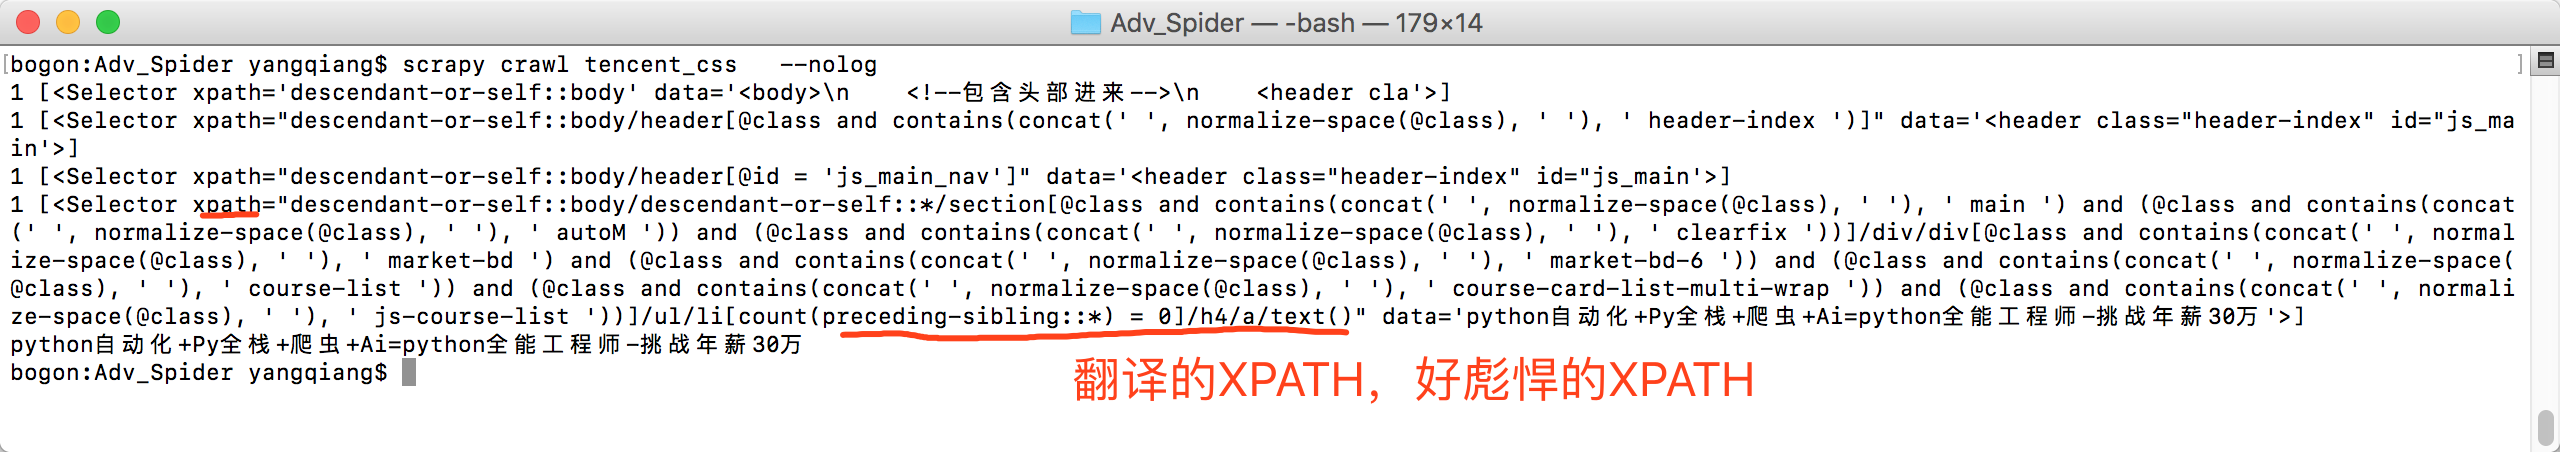

- 从上面的例子CSS还是有一点的简洁性。